In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np

In [2]:
data = pd.read_excel('seti_2.xlsx', sheet_name='Товары')

In [3]:
data.head()

,Сеть,Название,Хранение,"Цена, руб","Фасовка, г",Цена за 1 кг,Производитель,Бренд
0,Глобус,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Азбука вкуса,Ножки кролика,Охлажденный,553.0,490.0,1128.571429,Бежин луг,Бежин луг
2,Азбука вкуса,Филе кролика,Охлажденный,152.0,100.0,1520.000000,КРОЛЪ и К,КРОЛЪ и К
3,Азбука вкуса,Тушка кролика,Охлажденный,1596.0,2000.0,798.000000,КФХ Шатурский фермер,КРОЛЪ и К
4,Азбука вкуса,Фарш из кролика,Замороженный,490.0,500.0,980.000000,Арсеньевский м/к,Наша ферма


**Топ сетей, в которых больше всего продуктов из кролика**

In [4]:
top_net = data['Сеть'].value_counts().reset_index().head(10).rename(columns={'index':'net', 'Сеть':'count'})
top_net

,net,count
0,Metro,10
1,ВкусВилл,8
2,Азбука вкуса,5
3,Глобус Гурмэ,5
4,Лента,3
5,Перкресток,2
6,ТочкаМаркет,2
7,Billa,1
8,Авоська,1
9,Монетка,1


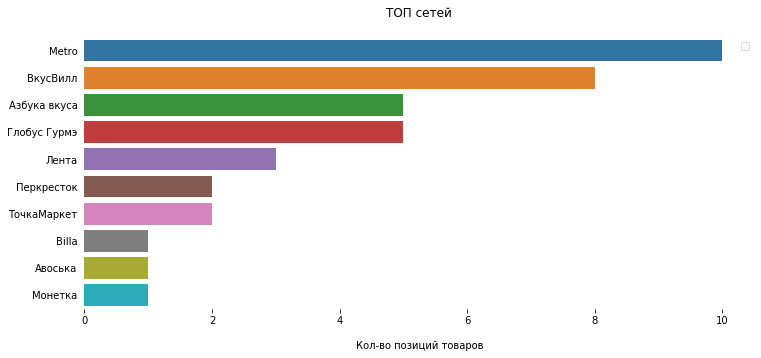

In [5]:
plt.subplots(figsize=(12, 5))
plt.title('ТОП сетей', pad=20)
plt.legend('')

ax = sns.barplot(x="count", y="net", data=top_net)
ax.tick_params(labelleft=True, left=False) # выводить значения по оси y, черточки нет
ax.set_xlabel('Кол-во позиций товаров', labelpad=15)
ax.set_ylabel('', labelpad=15)

sns.despine(left=True, bottom=True) # удалить линии границы

**Топ продуктов из кролика**

In [6]:
top_product = data['Название'].value_counts().reset_index().head(10).rename(columns={'index':'name', 'Название':'count'})
top_product 

,name,count
0,Тушка кролика,14
1,Ножки кролика,8
2,Котлеты из кролика,4
3,Пельмени с мясом кролика,3
4,Фарш из кролика,3
5,Филе кролика,2
6,Котелты из кролика,2
7,Печень кролика,1
8,Ножки кролика в маринаде,1
9,Тушка кролика в маринаде,1


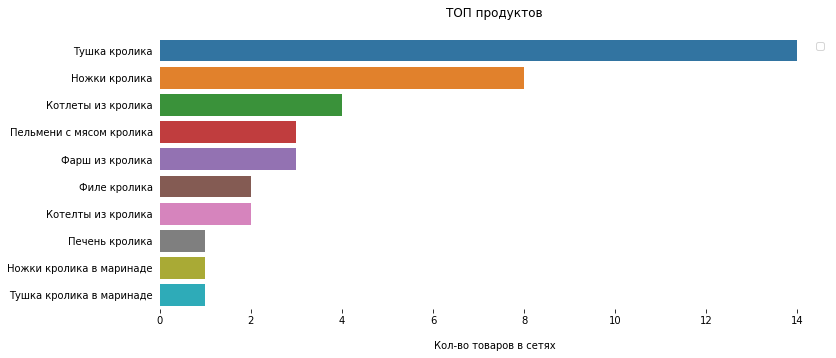

In [7]:
plt.subplots(figsize=(12, 5))
plt.title('ТОП продуктов', pad=20)
plt.legend('')

ax = sns.barplot(x="count", y="name", data=top_product )
ax.tick_params(labelleft=True, left=False) # выводить значения по оси y, черточки нет
ax.set_xlabel('Кол-во товаров в сетях', labelpad=15)
ax.set_ylabel('', labelpad=15)

sns.despine(left=True, bottom=True) # удалить линии границы

**Топ производителей**

In [8]:
top_produce = data['Производитель'].value_counts().reset_index().head(10).rename(columns={'index':'name', 'Производитель':'count'})
top_produce

,name,count
0,Неизвестно,16
1,КРОЛЪ и К,11
2,Арсеньевские фермы,5
3,Мозайцево,2
4,Арсеньевский м/к,1
5,«Оренбургский кролик»,1
6,"ЛИПЕЦКИЙ КРОЛИК, ООО",1
7,METRO CHEF,1
8,Бежин луг,1
9,КФХ Шатурский фермер,1


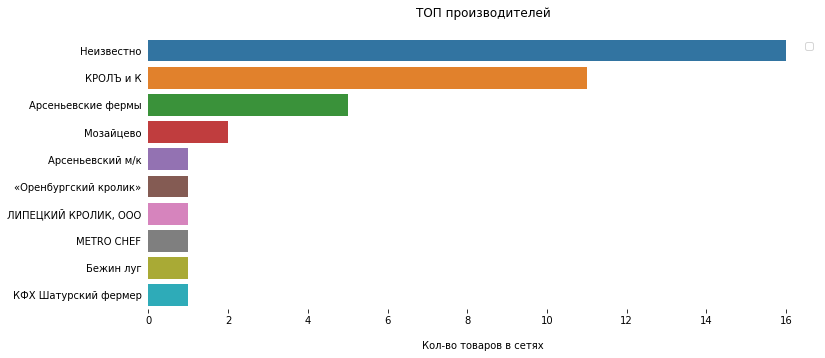

In [9]:
plt.subplots(figsize=(12, 5))
plt.title('ТОП производителей', pad=20)
plt.legend('')

ax = sns.barplot(x="count", y="name", data=top_produce)
ax.tick_params(labelleft=True, left=False) # выводить значения по оси y, черточки нет
ax.set_xlabel('Кол-во товаров в сетях', labelpad=15)
ax.set_ylabel('', labelpad=15)

sns.despine(left=True, bottom=True) # удалить линии границы

**Средняя цена за 1 кг для каждого вида продукта**

In [10]:
avg_price = data.pivot_table(index='Название', values='Цена за 1 кг', aggfunc='mean').sort_values('Цена за 1 кг', ascending=False).reset_index().round()
avg_price.index = avg_price.index + 1
avg_price

,Название,Цена за 1 кг
1,Тефтели из кролика,2690.0
2,Котлеты из кролика,1740.0
3,Котелты из кролика,1294.0
4,Филе кролика,1034.0
5,Пельмени с мясом кролика,988.0
6,Ножки кролика,970.0
7,Фарш из кролика,894.0
8,Ножки кролика в маринаде,829.0
9,Тушка кролика в маринаде,629.0
10,Тушка кролика,618.0


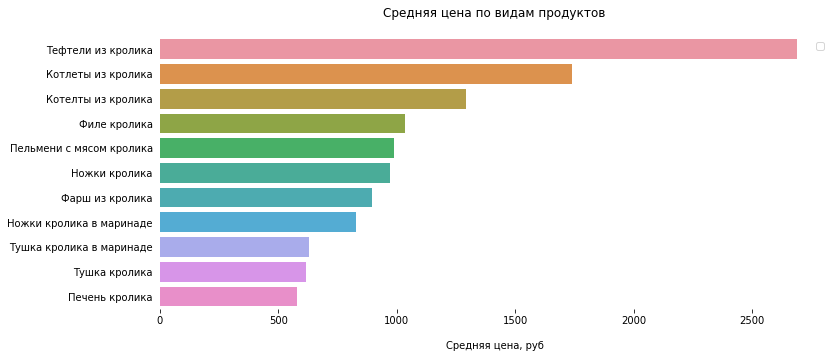

In [11]:
plt.subplots(figsize=(12, 5))
plt.title('Средняя цена по видам продуктов', pad=20)
plt.legend('')

ax = sns.barplot(x="Цена за 1 кг", y="Название", data=avg_price)
ax.tick_params(labelleft=True, left=False) # выводить значения по оси y, черточки нет
ax.set_xlabel('Средняя цена, руб', labelpad=15)
ax.set_ylabel('', labelpad=15)

sns.despine(left=True, bottom=True) # удалить линии границы

**Структура поисковых запросов**

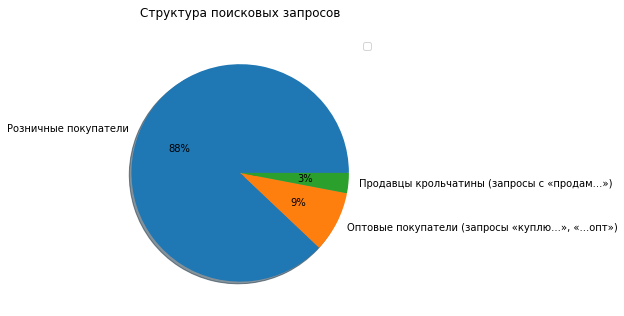

In [16]:
plt.subplots(figsize=(12, 5))
plt.title('Структура поисковых запросов', pad=20)
plt.legend('')

labels = ['Розничные покупатели','Оптовые покупатели (запросы «куплю...», «...опт»)','Продавцы крольчатины (запросы с «продам...»)']
values = [5954, 614, 203]

plt.pie(values, labels=labels, autopct='%.f%%', shadow=True)
print()